### Chapter 2.4
# Discrete Random Variable and Discrete Convolution

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---


A **random variable** is a variable whose possible values are numerical outcomes of a random phenomenon. It maps events to real values. There are two types of random variables, discrete and continuous. 

## Discrete Random Variable
A **discrete random variable** may take on only a countable number of distinct values and thus can be quantified. For example, you can define a random variable $X$ to be the number which comes up when you roll a fair dice. $X$ can take values : $[1,2,3,4,5,6]$ and therefore is a discrete random variable.

The probability distribution of a discrete random variable is a list of probabilities associated with each of its possible values. It is also sometimes called the **probability function** or the probability mass function. For the dice example, the probabilities are equal, i.e. $P(X=i)=p_i = 1/6$ for $i=1,\dots,6$. For $i>6$ or $i<1$, it is $p_i=0$.

The sum of all probabilities is
$
\sum_{i=-\infty}^\infty p_i = 1 \, .
$

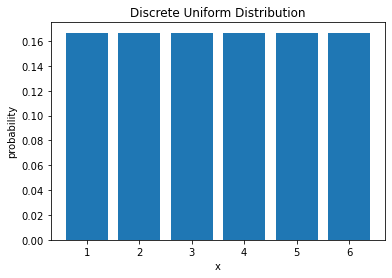

In [1]:
# display figures inline
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

p = np.array([1/6]*6)
x = np.arange(1,7)
plt.bar(x,p)
plt.xlabel('i')
plt.ylabel('probability')
plt.title('Discrete Uniform Distribution');

The cumulative distribution function (CDF) of a discrete random variable is the probability that the random value $X$ takes a value less or equal to $i$, i.e. $P(X\leq i)$. 

$
P(X \leq i) = \sum_{k=1}^i P(X=i) = \sum_{k=1}^i p_i 
$

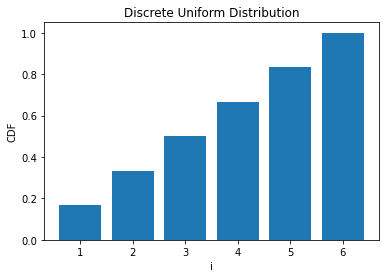

In [3]:
plt.bar(x, p.cumsum())
plt.xlabel('i')
plt.ylabel('CDF')
plt.title('Discrete Uniform Distribution');

The **expected value** $E[X]$ of a random variable is the long-run average value of repetitions of the same experiment it represents, see [wikipedia](https://en.wikipedia.org/wiki/Expected_value). 

$
E[X] = \sum_{i=-\infty}^\infty i\cdot P(X=i) = \sum_{i=-\infty}^\infty i\cdot p_i
$

The second moment is derived as follows.

$
E[X^2] = \sum_{i=-\infty}^\infty i^2\cdot P(X=i) = \sum_{i=-\infty}^\infty i^2\cdot p_i
$

The variance can be derived by
$
Var[X] = E[X^2]-E[X]^2 \, .
$

The standard deviation is 
$Std[X] = \sqrt{Var[X]}$
and the coefficient of variation is
$c_X = \frac{Std[X]}{E[X]} \, .$

### Bernoulli Distribution
The most simple discrete distribution is the Bernoulli distribution. The random variable $X$ takes two values only, $X=1$ (success) with probability $p$ or $X=0$ (failure) with probability $1-p$. A single experiment is called a Bernoulli experiment.

$
X \sim \mathrm{BER}(p), E[X] = p, Var[X] = p-p^2, c_X = \sqrt{\frac{1}{p}-1}
$

### Binomial Distribution
The binomial distribution $Y$ counts the number of successes if a Bernoulli experiment $X$ with success probability $p$ is repeated $n$ times. Hence, the random variable $Y$ takes values in the range $0,1,\dots,n$. In other words, $Y$ is the sum of $n$ random variables $X_i$ following a Bernoulli distribution, $X_i \sim Ber(p)$.

$
Y = \sum_{i=1}^n X_i \sim \mathrm{BINOM}(n,p) \text{ for } X_i \sim \mathrm{BER}(p)
$

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from scipy.stats import binom

plt.figure()
plt.clf()

def update_bino(n=7, p=0.65):
    x = np.arange(n+1)
    plt.bar(x, binom.pmf(x, n, p))   
    plt.xlabel('y')
    plt.ylabel('probability')
    plt.title(f'Binomial Distribution Y~Bin({n},{p})');
    plt.show();
    
interact(update_bino, n = (2,20,1), p=(0,1,0.05));

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=7, description='n', max=20, min=2), FloatSlider(value=0.65, description=…

We are using now numerical convolution of the Bernoulli distribution to generate the Bernoulli distribution, see [numpy.convolve](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.convolve.html). 

## Discrete Convolution
Let us assume that the two positive discrete random variables $X_1$ and $X_2$ are statistically independent. Then the sum $X=X_1+X_2$ leads to a new random variable $X$. The expected value is $E[X]=E[X_1]+E[X_2]$. For the probability distribution $x(i)$ for $i=0,1,\dots$, the convolution of the two distributions is required.

$
x(i) = P(X=i) = P(X_1+X_2)=i=\sum_{j=0}^i P(X_1=i-j|X_2=j)\cdot P(X_2=j) = \sum_{j=0}^i x_1(i-j)\cdot x_2(j)
$

This is called **discrete convolution** and denoted by 
$
x(i) = x_1(i) * x_2(i) \, .
$

### Example: Binomial distribution as sum of Bernoulli experiments

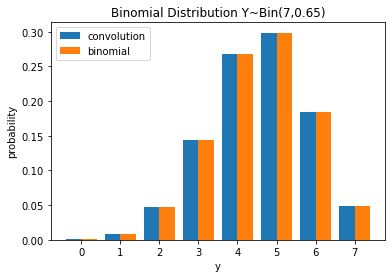

In [6]:
n, p = 7, 0.65

ps = [1-p, p]
res = ps
for i in range(2,n+1):
    res = np.convolve(res, ps)

w = 0.4
plt.figure()
x = np.arange(n+1)
plt.bar(x,res, label='convolution', width=-w, align='edge')
plt.bar(x,binom.pmf(x,n,p), label='binomial', width=+w, align='edge')
plt.xlabel('y')
plt.ylabel('probability')
plt.legend()
plt.title(f'Binomial Distribution Y~Bin({n},{p})');

### Example: Sum of two dice
As an example, we consider the discrete random variables $X_1 = DU(1,6)$ and $X_2 = DU(1,6)$. In Python the discrete convolution is computed with [numpy.convolve](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.convolve.html). Note the range of the sum $X=X_1+X_2$ is $\{2,3,\dots,11,12\}$.

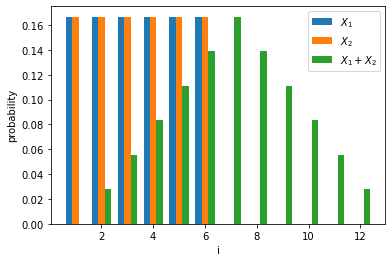

In [10]:
p1 = np.array([1/6]*6)
x1 = np.arange(1,7)

p2 = np.array([1/6]*6)
x2 = np.arange(1,7)

p = np.convolve(p1,p2)
x = np.arange(2,13)
w = 0.25
plt.figure()
plt.bar(x1-w, p1, width=w, align='center', label='$X_1$')
plt.bar(x2, p2, width=w, align='center', label='$X_2$')
plt.bar(x+w, p, width=w, align='center', label='$X_1+X_2$')
plt.xlabel('i')
plt.ylabel('probability');
plt.legend();